In [1]:
# Title: Contact models for atomic force microscopy
# Author: J. P. S. Ferreira
# Date: 2023-01-17
# Description: This notebook is a draft for a work on contact models for atomic force microscopy. It is a work in progress.
# Literature: 
# https://www.sciencedirect.com/science/article/pii/S0968432822000245
# https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-019-3010-3
# License: MIT

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
def hertz(i, E, nu, r):
    """Hertz model for indentation.
    
    approximation for parabolic indenter.
    Parameters
    ----------
    i : float
        Indentation depth.
    E : float
        Young's modulus.
    nu : float
        Poisson's ratio.
    R : float
        Radius of the indenter.
        
    Returns
    -------
    float
        Contact force.
    """
    a = i/r
    factor = 1 - 0.1 * a - (1/840) * a**2 + (11/15120) * a**3 + (1357/6652800) * a**4
    force = 4/3 * E / (1 - nu**2) * np.sqrt(r)*i**1.5 * factor
    # make nan values zero
    force[np.isnan(force)] = 0
    return force

In [138]:
# resolution of the map
res = 10
# random values
size = res * res
# Young's modulus
E = np.random.normal(loc=1.0, scale=0.1, size=size)
# Poisson's ratio
nu = 0.5
# radius of the indenter
r = 1.0
# indentation depth
i = np.linspace(-10, 5, 100)
# construct dataframe
df = pd.DataFrame()
df['E'] = E.tolist()
df['ind'] = [i for _ in range(len(df))]
df['f'] = df.apply(lambda x: hertz(x.ind, x.E, nu, r), axis=1)

/var/folders/x7/wn0m19s14b134p11_cy_rn540000gn/T/ipykernel_27983/1411104662.py:23: RuntimeWarning: invalid value encountered in power
  force = 4/3 * E / (1 - nu**2) * np.sqrt(r)*i**1.5 * factor


(5.75, -10.75, -0.8522385588163943, 17.89700973514428)

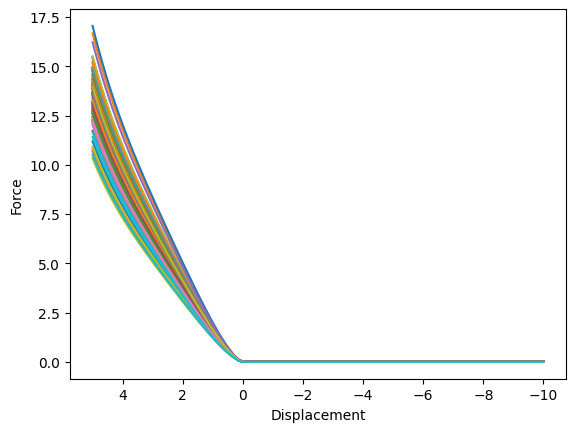

In [139]:
# plot all entries naively
for i, row in df.iterrows():
    plt.plot(row['ind'], row['f'])
#add labels
plt.xlabel('Displacement')
plt.ylabel('Force')
# invert x axis
ax = plt.axis()
plt.axis((ax[1],ax[0],ax[2],ax[3]))

<AxesSubplot: xlabel='ind', ylabel='f'>

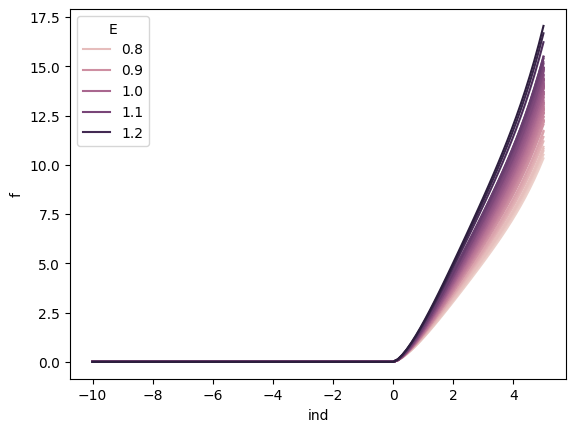

In [155]:
# plot all entries with seaborn
df2 = df.set_index(['E']).apply(pd.Series.explode).reset_index()
sns.lineplot(data=df2, x='ind', y='f', hue='E')

<AxesSubplot: >

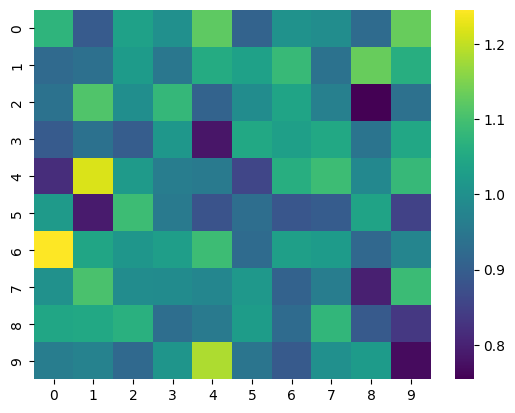

In [140]:
# map random values to a 2D array
E_map = np.reshape(E, (res, res))
# Young's modulus random map
sns.heatmap(E_map, cmap='viridis')
#NOTE: examples at https://seaborn.pydata.org/examples/index.html

<AxesSubplot: >

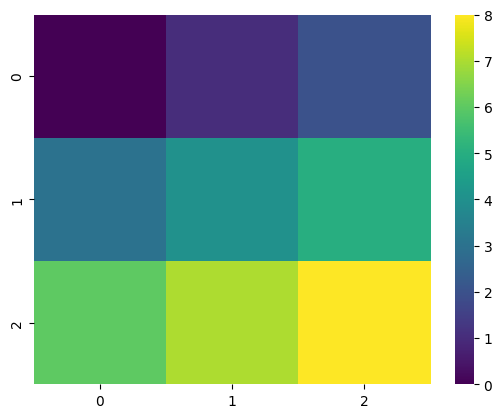

In [149]:
#check reshape rule.
# create sequential integers array of size 9
v = np.arange(0, 9, 1, dtype=int)
# reshape to 3x3
vmap = np.reshape(v, (3, 3))
# print array
sns.heatmap(vmap, cmap='viridis')
#NOTE: reshape rule is row-major, i.e. the first index is the row index. The second index is the column index.